**<h1>Monte Carlo Simulation of the Ising Model</h1>**

**Albion Alushani, Queen Mary University of London, School of Physics and Astronomy**

## **Introduction**

In the Ising model, a mathematical model of ferromagnetisation, contains atoms represented with a spin "up" or spin "down" which can be represented with "+1" and "-1" respectively. An example of this can be an element which can be magnetized in a magnetic field but when heated it will lose its magnetization beyond a certain temperature (otherwise known as the Curie temperature)**[1]**. The energy can be represented as such.

$$
E = -J\sum\limits_{i,j}^{n.n.}s_is_j
$$

Here *$J$* is greater than zero $(J>0)$ and $s_i$ and $s_j$ represent the spin of the atom and its neighbour. By representing the atoms as an array and performing the Marko Chain Monte Carlo method in python we can find the Curie temperature by making a plot of the equilibrated magnetization as a function of temperature and inspecting the graph to determine where the Curie temperature lies (that is the temperature at which the magnetization decreases significantly) which is the aim. By generating a random NxN matrix of random spins to create a lattice and implementing the Monte Carlo method to select and random spin in the lattice which in turn changes the energy we can choose to accept or decline the move if it fulfills certain conditions. The conditions being that the change in energy has to be less than zero ($\Delta E<0$), that is a change that will always decrease the energy of the system or if ($\Delta E>0$) we can still accept the move provided a random number ($z$) between 0 and 1 is less than an acceptance parameter ($z<\Delta E /K_bT$) with $K_b$ and $T$ representing the Boltzmann constant and temperature respectively. After performing the simulations for a set amount of steps a plot of the spontaneous magnetization which is the sum of all spins ($\sum\limits_{i}s_i$) and identifying the burn in the posterior needs to be determined and extracted to obtained the equilibrated magnetization. Hence the equilibrated magnetization can be plotted as a function of time (by repreating the method above for a range of temperatures) and visually the Curie temperature should be roughly visible from the graph. We can also determine if the system has lost its magnetic properties by viewing the spin configuration after the Monte Carlo method.

## **Method**

**NOTE: The code may take a couple of minutes to run due to the amount of steps in the MCMC portion**

To being we import the following in-built python libraries.

In [1]:
import numpy as np
from numpy.random import random, seed
import matplotlib.pyplot as plt

Next the lattice needs to be created. The lattice should contain and NxN number of atoms with a randomly generated spin ("up" or "down"). It is efficient to do this in a function which takes an argument $L$, with $L$ being the number that will be the square grid of atoms (for simplicity the number 5 ($L=5$) was chosen). Using the 'random.randint' function in the numpy library we can generate random spins in the LxL grid. However since 'random.randint' generates random numbers zeros and ones we manipulate the grid by changing the zeros to negative ones (as seen below).

In [2]:
L = 5

#function to create lattice
def atom_grid(L):
    lattice = np.random.randint(0,2,(L,L))
    lattice[lattice==0] = -1
    return lattice

For convenience we store this randomly generated grid in a variable (called 'm') and display the grid by printing it out.

In [3]:
m = atom_grid(L)
print(m)

[[ 1 -1  1 -1  1]
 [ 1 -1  1  1  1]
 [ 1  1 -1  1 -1]
 [-1 -1 -1  1 -1]
 [-1  1  1  1 -1]]


The energy of the system needs to be calculated (for now this is the energy of the system but in the Monte Carlo part of the code it will become the 'Inital Energy'). Recall that the equation for the energy of the system was given by the following.

$$
E = -J\sum\limits_{i,j}^{n.n.}s_is_j
$$

Once again a function will be more efficient as the method to calculate the energy will be used repeatedly in the Monte Carlo code. The function will take two arguements, m and J with m being the grid stored previously and J being a constant (again for convenience $J = 1$). Within the function are two for loops to loop over the rows and columns of the grid. There is also an array called 'lattice_sum' which is the sum component of the energy equation above. The for loops will loop over each atom in the grid and sum the neighbours around the atom. To do this, we isolate each atom indiviually by manipulating the grid (done by selecting an atom in the grid m[i,j] and then performing the sum of all atoms around the atom). The for loops are looped in a range up to the length of the grid (len(m)), in this case the length being 5. However since python starts from 0 there will be an error in the for loop as both i and j will go to 5 (a $5th$ row and column) that is one extra from which python counts from (since $L=5$ , python will only go up to 4). Not only that but whilst manipulating we also go to an unexisting neighbour (for example m[i,j+1] where j+1 is out of bounds). To overcome this, we can state that if i and j are greater than the length of the grid or equal to -1 we can periodically move the sum over. For example should we get to the corners of the grid we move over so that its j+1 neighbour is the first column atom (i.e. assume we start counting as python does and start counting from the basis that the first row is row zero (i=0) and the first column is column zero (j=0) and should we get to an atom which is m[0,5] we can make its neighbour to the left be the first atom m[0,0]). All these are stored in the array 'lattice_sum' which we then sum over to get a single value (using np.sum) and multiplying it with negative J ($-J$) which is the returned value of the function.

In [4]:
#calculate the total energy by taking sum of neighbouring spins
def total_energy(m,J):

    lattice_sum = []
    for i in range(len(m)):
        for j in range(len(m)):
            lattice1 = m[i,j]

            if (i+1)==len(m):
                neighbour_sum = m[0,j] + m[i,j] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j+1)==(len(m)):
                neighbour_sum = m[i,j] + m[i,0] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (i-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[0,j] + m[i,j]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,0]
                lattice_sum.append(neighbour_sum*lattice1)

            else:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

    return  -J*np.sum(lattice_sum)

Once again it is nice to know the initial energy of the system generated. We can see this by printing out the value. Again the arguements where m is the grid and J is the constant are put in place below ($J=1$).

In [5]:
#prints total energy
print(total_energy(m,1))

-16


To visualize the initial spin configuration of the system we can use the 'plt.quiver' function in the 'matplotlib.pyplot' library to plot the spins on a grid and see how many are facing "up" and "down". This is also useful to make predictions on whether all the spins for the equilibrated magnetization will be "up" or "down" after the Monte Carlo method as if initally there are more "up" spins than "down" spins then all the spins after the Monte Carlo method will be "up".

Text(0.5, 1.0, 'Initial Spin Configuration')

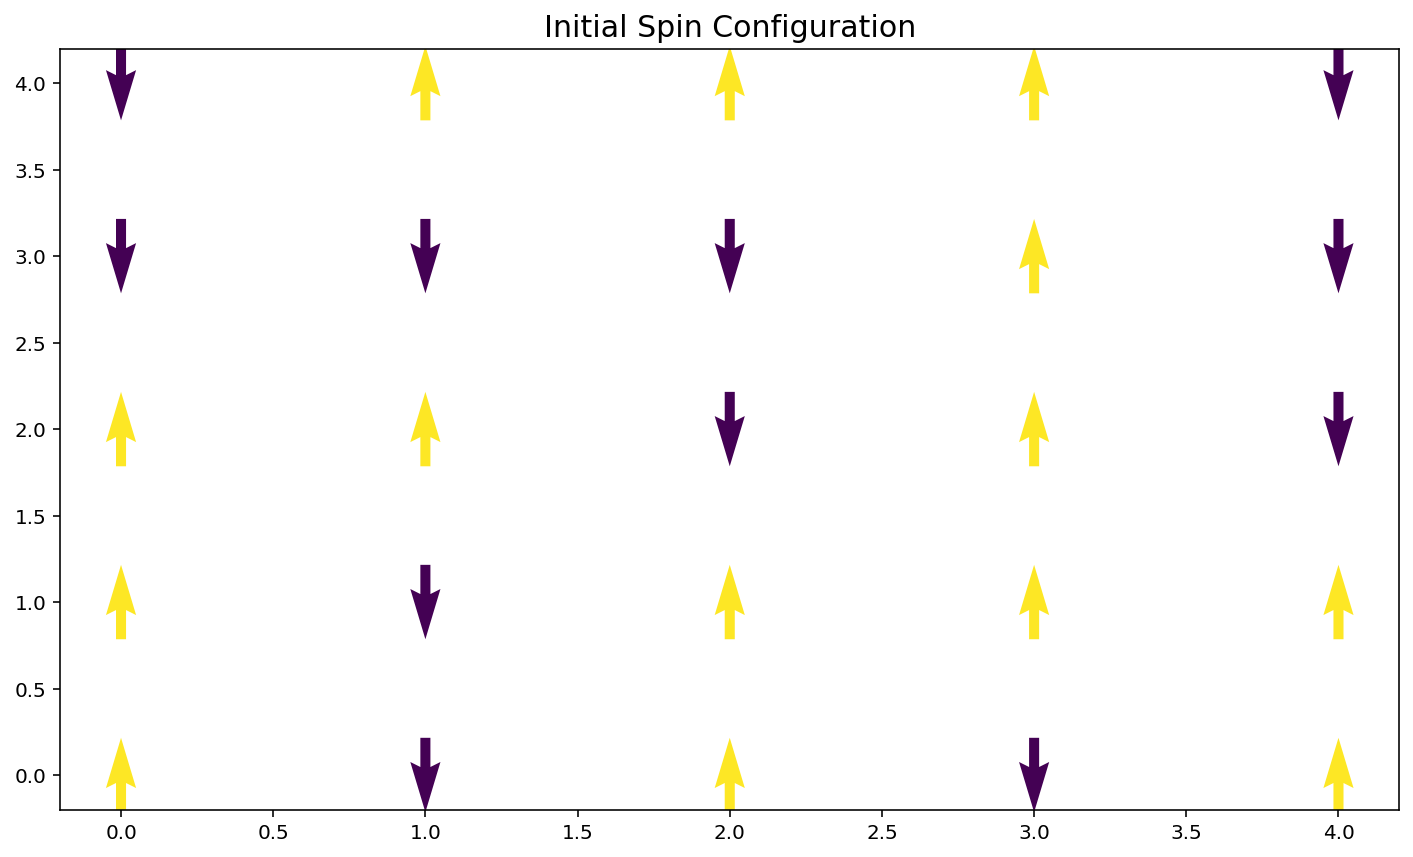

In [6]:
#visual representation of inital spin configuration
plt.quiver(m*0,m,m, pivot="middle")
plt.title("Initial Spin Configuration",fontsize=15)

The following code performs the Monte Carlo method and simulates the Ising model using the metropolis algorithm. This will be performed 100000 times (nsteps = 100000). The inital parameters are all set at 1, that is $K_b = 1$, $J = 1$ and $T = 1$. A list to store the magnetizations called 'Magnetization' is also created with the inital magnetization of the system stored in.

A for loop then loops over 'nsteps' amount of times with the 'Initial_Energy' being the previous energy calculated. Two variables named 'random_row' and 'random_column' each do the same thing using the numpy function 'random.randint' to generate a random number for a row and a random number for column to select a random atom in the grid. This is called 'sliced_lattice'. Then if the 'sliced_lattice' is '+1' (that is spin "up") it gets changed to '-1' (spin "down") and vice versa. The grid then gets altered with the new spin and a new energy is calculated with the new lattice. The change in energy ('Delta_Energy') is calculated using the new energy and subtracting from it the initial energy. Then we perform the step. Recall the condition to accept the step is ($z<\Delta E /K_bT$) and so if a random number between 0 and 1 is less that this condition we accept this change else we revert the spin back to its original state. The magnetization is calculated by taking the sum of all spins in the lattice and appending it to the 'Magnetization' list.

In [7]:
nsteps = 100000
seed(1)
beta = 1

#initial parameters
current_Kb = 1
current_T = 1
current_J = 1

#Magnetisation
Magnetisation = [m.sum()]

#Markov Chain Monte Carlo method
for i in range(nsteps):

    #Initial Energy
    Initial_Energy = total_energy(m,current_J)

    #picking a random row and column
    random_row = np.random.randint(0,len(m))
    random_column = np.random.randint(0,len(m))

    #isolated spin
    sliced_lattice = m[random_row,random_column]

    #changing spin
    if sliced_lattice==1:
        sliced_lattice = -1
    elif sliced_lattice==-1:
        sliced_lattice = 1

    m[random_row,random_column] = sliced_lattice

    New_Energy = total_energy(m,current_J)

    Delta_Energy = New_Energy - Initial_Energy

    #accepting the move if conditions are met
    if random() < np.exp(-Delta_Energy/(current_Kb*current_T)):
        Initial_Energy = New_Energy
    else:
        m[random_row,random_column] = -sliced_lattice

    EM = m.sum()
    Magnetisation.append(EM)

To identify and seperate the "equilbrated magnetization" from the "spontaneous magnetization" we plot the 'Magnetization' array using the 'plt.plot' function from the 'matplotlib.pyplot' library. The 'burn-in' section will be the "spontaneous magnetization" and the posterior will be the "equilibrated magnetization" which after the burn in will be a straight line and a constant value. You will notice a slice of [20000:] and this was placed solely from the fact that whilst coding and running the code multiple times it was evident that a slice of values from 20000 onwards would suffice. The print statement prints the average value of all the values from the posterior.

Magnetisation = 25.00


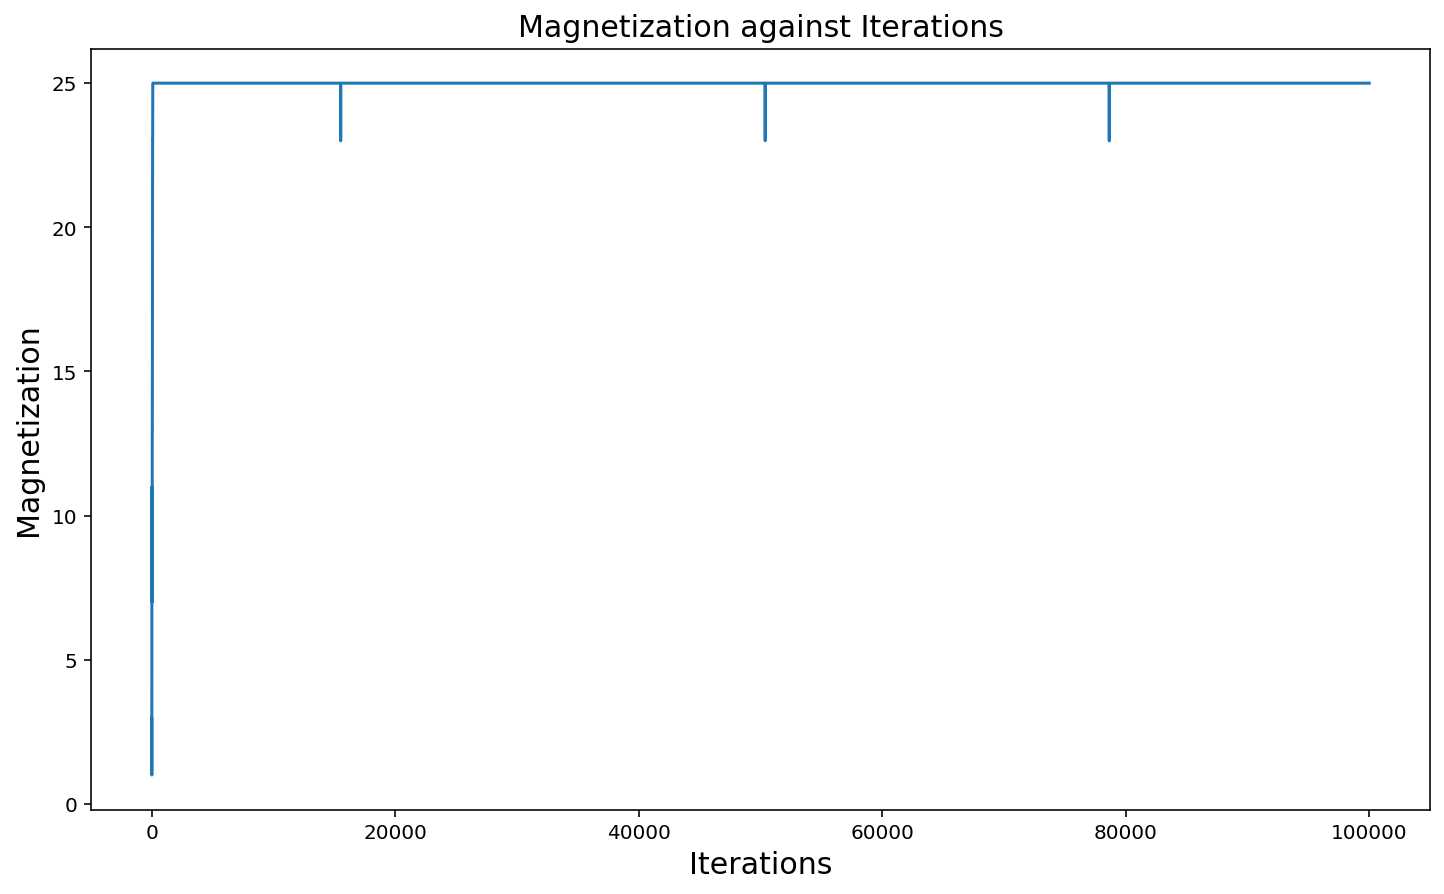

In [8]:
#burn-in and posterior plot
plt.plot(Magnetisation)
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Magnetization', fontsize=15)
plt.title('Magnetization against Iterations',fontsize=15)
print(f"Magnetisation = {np.average(Magnetisation[20000:]):.2f}")

Again it would be interesting to view the spins of the lattice after performing the Monte Carlo method at temperature = 1. This is done (as before) with the 'plt.quiver' function. However, based off the previous plot of the magnetization you can already see if the spins will all align "up" or "down" by seeing the the burn-in is going upwards or downwards.

Text(0.5, 1.0, 'Spin Configuration after MCMC')

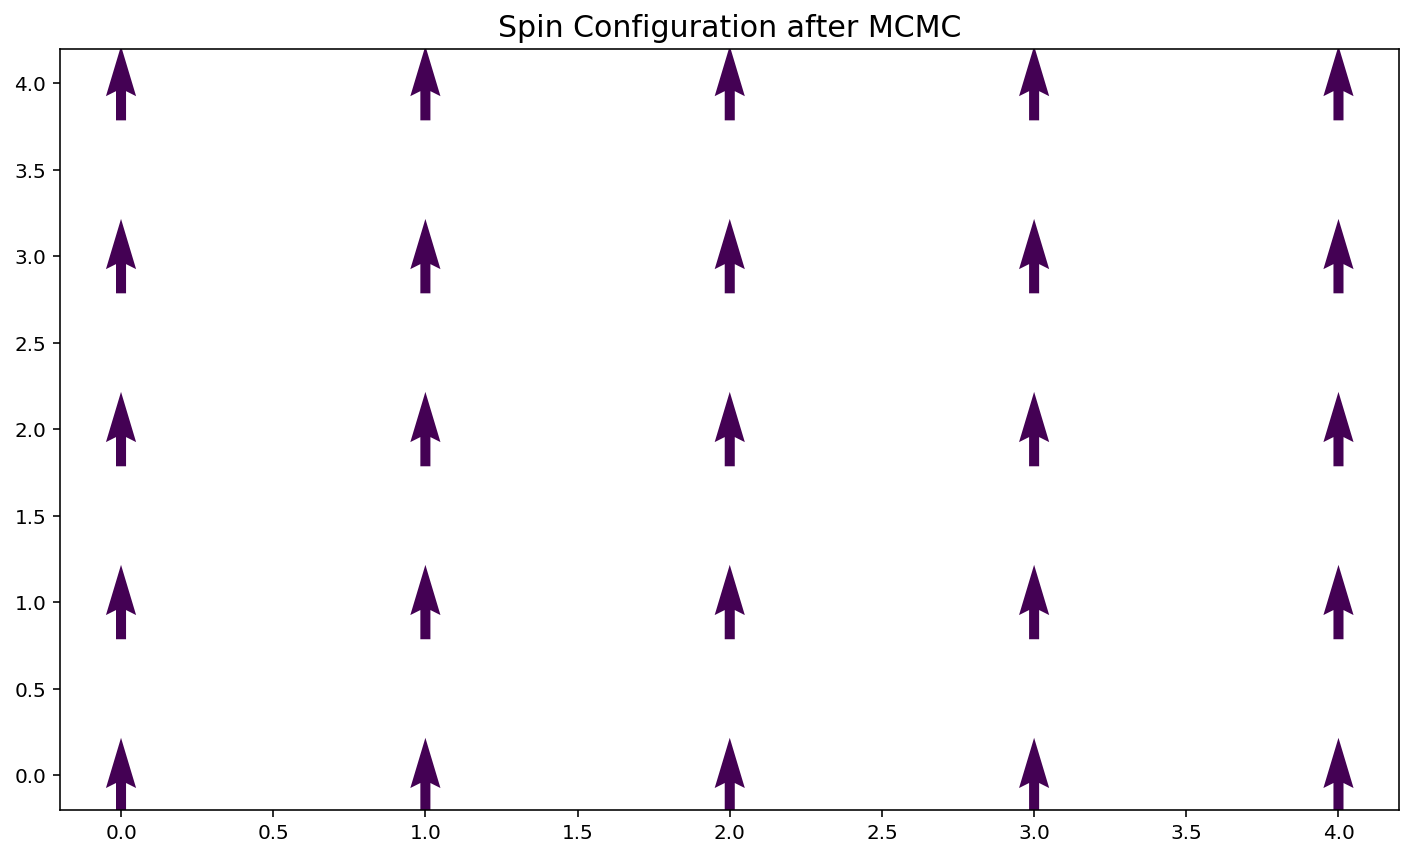

In [9]:
#spin configuration after MCMC
plt.quiver(m*0,m,m, pivot="middle")
plt.title("Spin Configuration after MCMC",fontsize=15)

**To investigate the effect of a higher temperature:**

The exact same steps above are repeated for a temperature of 20 Kelvin as seen below with the only difference setting the temperature from 1 to 20.

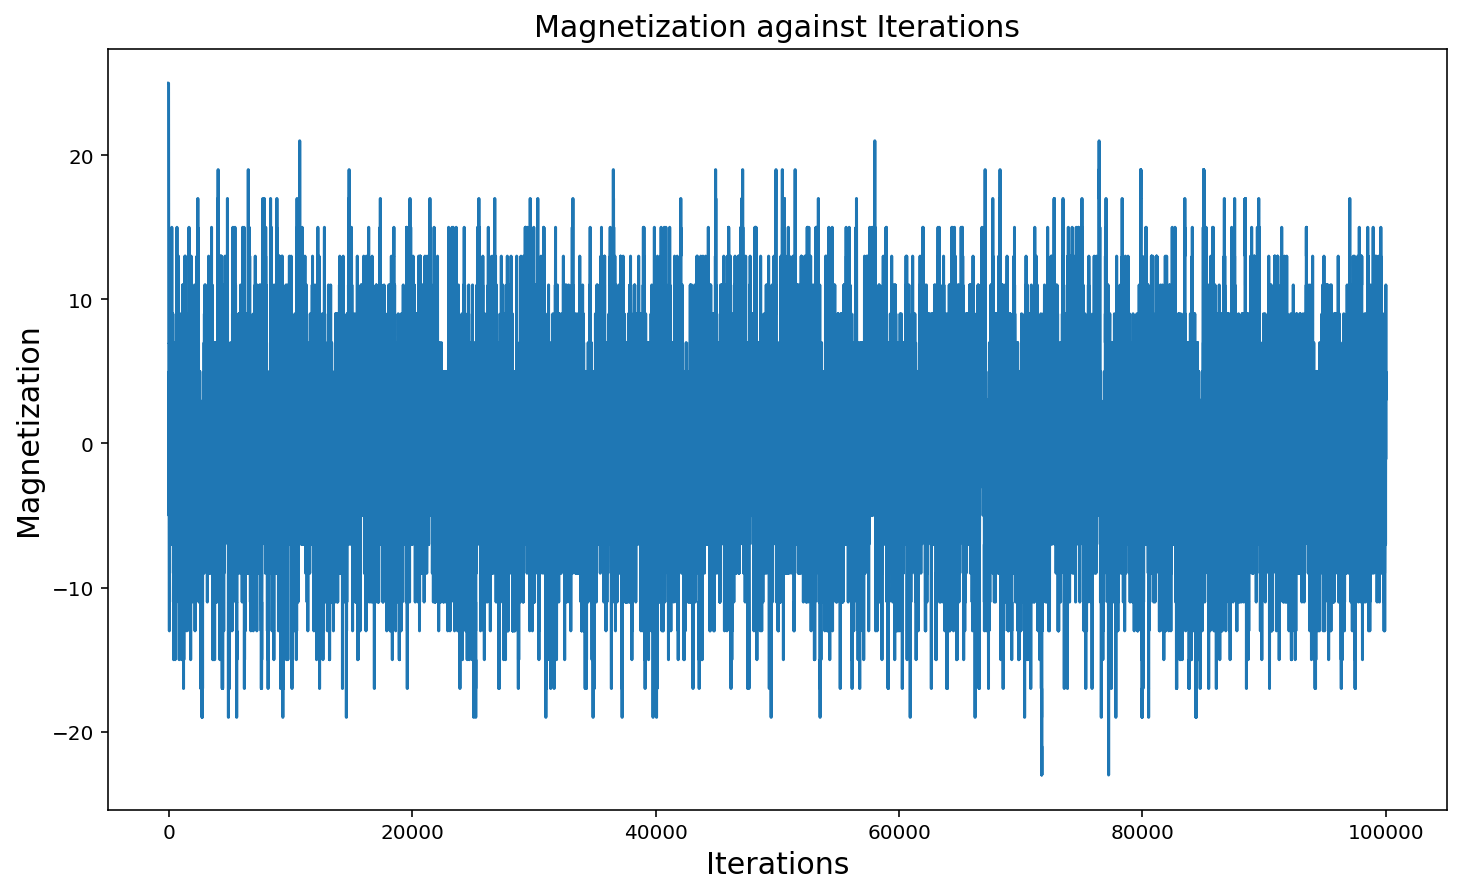

Text(0.5, 1.0, 'Spin Configuration after MCMC')

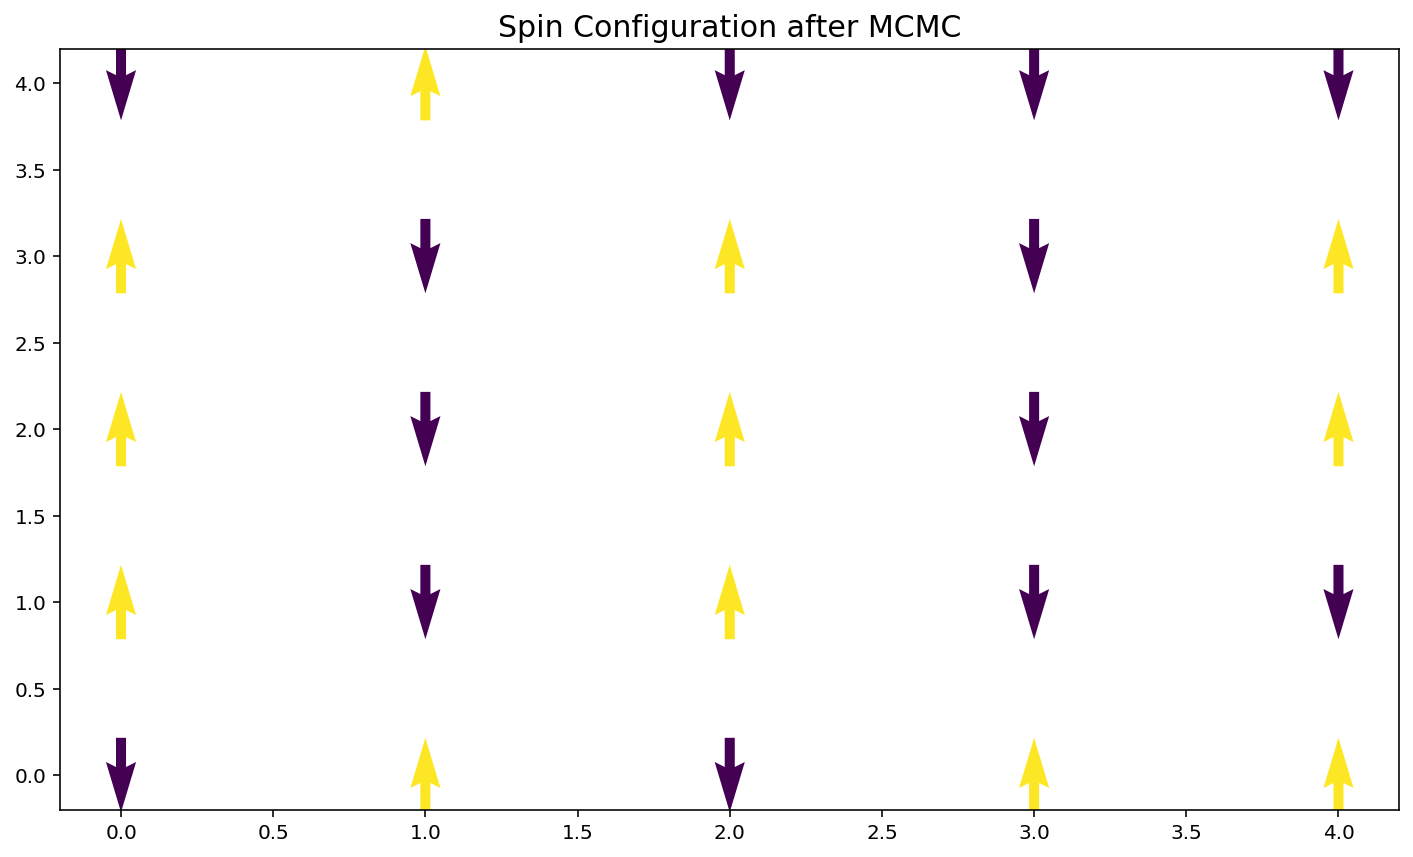

In [10]:
import numpy as np
from numpy.random import random, seed
import matplotlib.pyplot as plt

#initial size of lattice
L = 5

#function to create a random lattice of spins up or down

def atom_grid(L):
    lattice = np.random.randint(0,2,(L,L))
    lattice[lattice==0] = -1              #turning all zeros' in the matrix to -1
    return lattice

#calculate the total energy by taking sum of neighbouring spins
def total_energy(m,J):

    lattice_sum = []
    for i in range(len(m)):
        for j in range(len(m)):
            lattice1 = m[i,j]

            if (i+1)==len(m):
                neighbour_sum = m[0,j] + m[i,j] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j+1)==(len(m)):
                neighbour_sum = m[i,j] + m[i,0] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (i-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[0,j] + m[i,j]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,0]
                lattice_sum.append(neighbour_sum*lattice1)

            else:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

    return  -J*np.sum(lattice_sum)

nsteps = 100000
seed(1)
beta = 1

#initial parameters
current_Kb = 1
current_T = 20
current_J = 1

#Magnetization
Magnetisation = [m.sum()]

#Markov Chain Monte Carlo method
for i in range(nsteps):

    #Initial Energy
    Initial_Energy = total_energy(m,current_J)

    #picking a random row and column
    random_row = np.random.randint(0,len(m))
    random_column = np.random.randint(0,len(m))

    #isolated spin
    sliced_lattice = m[random_row,random_column]

    #changing spin
    if sliced_lattice==1:
        sliced_lattice = -1
    elif sliced_lattice==-1:
        sliced_lattice = 1

    m[random_row,random_column] = sliced_lattice

    New_Energy = total_energy(m,current_J)

    Delta_Energy = New_Energy - Initial_Energy

    #accepting the move if conditions are met
    if random() < np.exp(-Delta_Energy/(current_Kb*current_T)):
        Initial_Energy = New_Energy
    else:
        m[random_row,random_column] = -sliced_lattice

    EM = m.sum()
    Magnetisation.append(EM)

#burn-in and posterior plot
plt.plot(Magnetisation)
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Magnetization', fontsize=15)
plt.title('Magnetization against Iterations',fontsize=15)

#spin configuration after MCMC
plt.show()
plt.quiver(m*0,m,m, pivot="middle")
plt.title("Spin Configuration after MCMC",fontsize=15)

To plot the equilibrated magnetization as a function of temperature and locate the Curie temperature the Monte Carlo method needs to be performed for a range of temperature values. There is a slight change to the code for the Monte Carlo method above. The only difference is the method being looped in a range of values (chosen to be 1 to 10). Below we append the average magnetization (the posterior averaged) to the array 'Average_Mag'. The if statements are there so that all values of magnetization are positive. Although negative values can be obtained and still can give a correct result, for convenience to study the Curie temperature it is beneficial to have all magnetization values positive.

In [11]:
import numpy as np
from numpy.random import random, seed
import matplotlib.pyplot as plt

#initial size of lattice
L = 5

#function to create a random lattice of spins up or down

def atom_grid(L):
    lattice = np.random.randint(0,2,(L,L))
    lattice[lattice==0] = -1              #turning all zeros' in the matrix to -1
    return lattice

#calculate the total energy by taking sum of neighbouring spins
def total_energy(m,J):

    lattice_sum = []
    for i in range(len(m)):
        for j in range(len(m)):
            lattice1 = m[i,j]

            if (i+1)==len(m):
                neighbour_sum = m[0,j] + m[i,j] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j+1)==(len(m)):
                neighbour_sum = m[i,j] + m[i,0] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (i-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[0,j] + m[i,j]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,0]
                lattice_sum.append(neighbour_sum*lattice1)

            else:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

    return  -J*np.sum(lattice_sum)

nsteps = 100000
seed(1)
beta = 1

Average_Mag = []
Tempvals = []

#Initial Parameters
current_Kb = 1
current_J = 1

Magnetisation = [m.sum()]

#Perfoming MCMC for a range of different temperature values
for j in range(1,11):
    current_T = j
    for i in range(nsteps):

        Initial_Energy = total_energy(m,current_J)

        random_row = np.random.randint(0,len(m))
        random_column = np.random.randint(0,len(m))

        sliced_lattice = m[random_row,random_column]

        if sliced_lattice==1:
            sliced_lattice = -1
        elif sliced_lattice==-1:
            sliced_lattice = 1

        m[random_row,random_column] = sliced_lattice

        New_Energy = total_energy(m,current_J)

        Delta_Energy = New_Energy - Initial_Energy


        if random() < np.exp(-Delta_Energy/(current_Kb*current_T)):
            Initial_Energy = New_Energy
        else:
            m[random_row,random_column] = -sliced_lattice

        EM = m.sum()
        Magnetisation.append(EM)

    #to change all values of Magnetisation to positive for convinenece
    Avg = np.average(Magnetisation[20000:])
    if Avg>0:
        Average_Mag.append(Avg)
    else:
        Average_Mag.append(-Avg)
    Tempvals.append(current_T)

Finally, using the 'plt.plot' function from 'matplotlib.pyplot' we can plot the equilibrated magnetization as a function of temperature.

Text(0.5, 1.0, 'Equilibrated Magnetization as Function of Temperature')

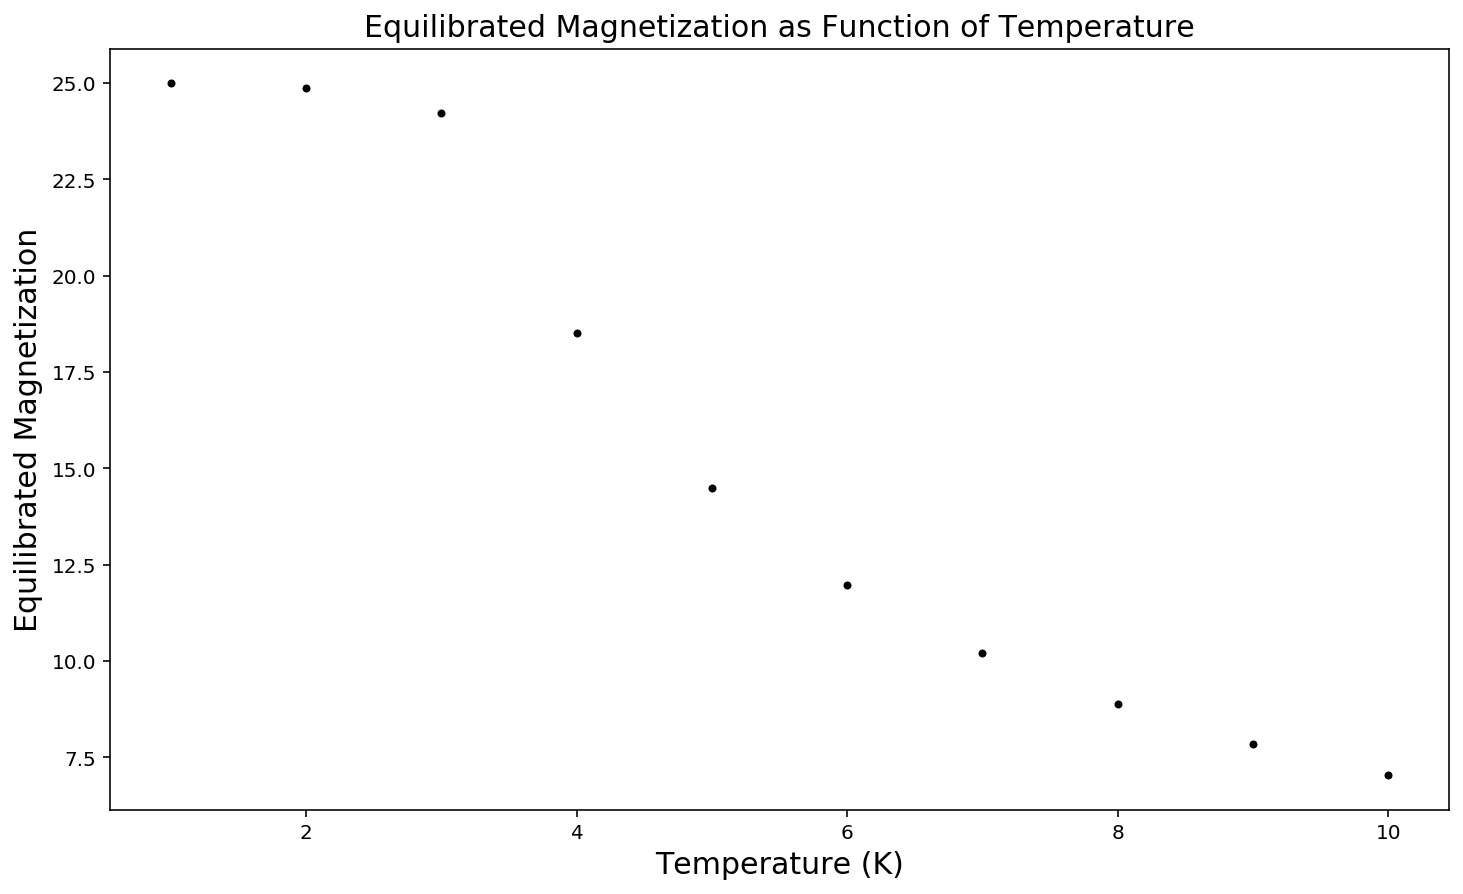

In [12]:
#plot of equilibrated magnetization as a function of temperature
plt.plot(Tempvals,Average_Mag,'k.')
plt.xlabel('Temperature (K)', fontsize=15)
plt.ylabel('Equilibrated Magnetization', fontsize=15)
plt.title('Equilibrated Magnetization as Function of Temperature',fontsize=15)

## **Results**

**NOTE: Both the above code and the results below vary to a small degree. They are very similar however since each time you run the code the lattic is generated randomly so you can expect to see very similar results with a few minor if not irrelevant alterations.**

**Case 1: Equilibrated Magnetization with spins "down" at $$T = 1$$**

Initial Spin Configuration (5x5) lattice:

<center>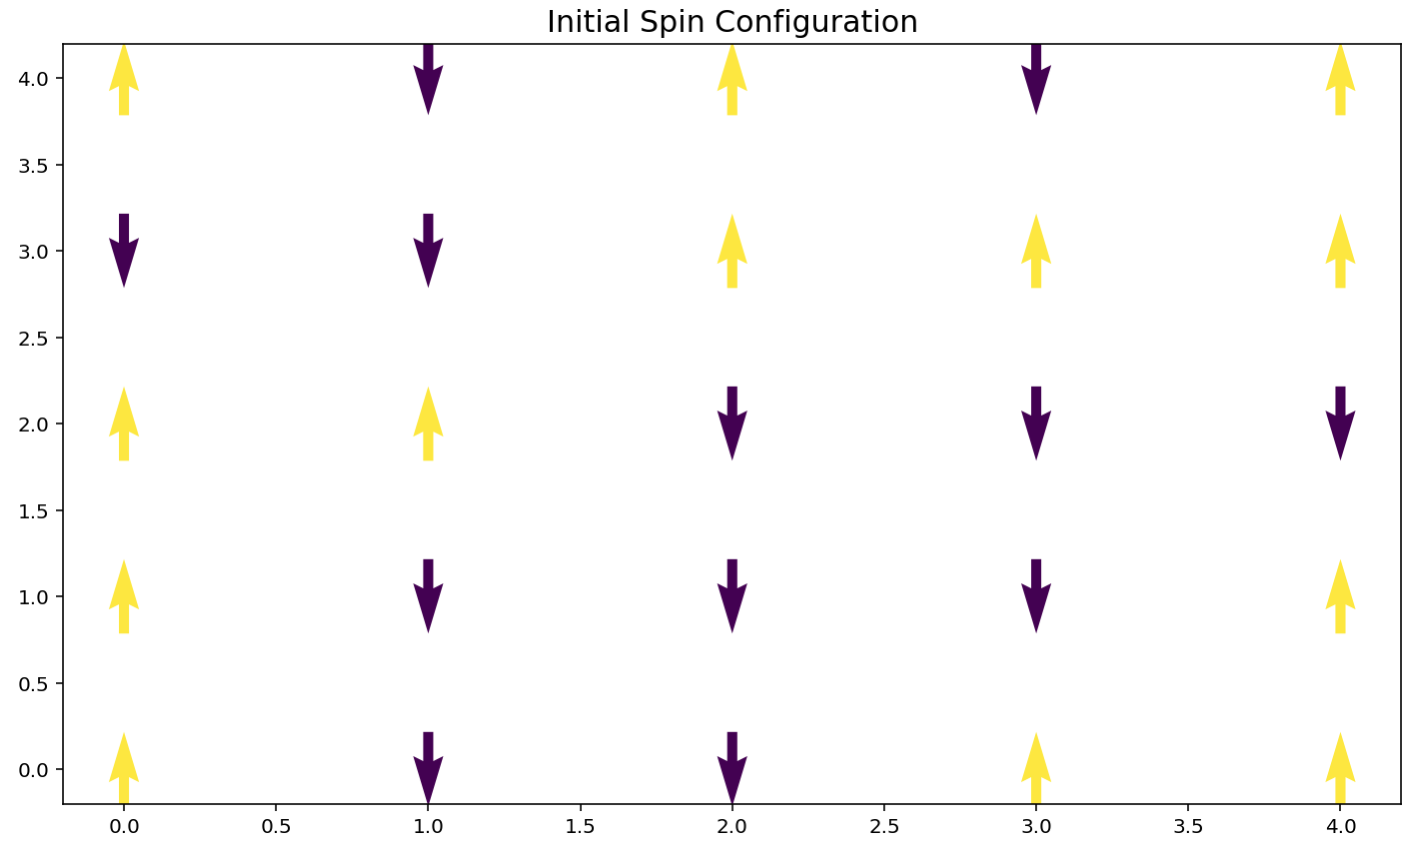</center>
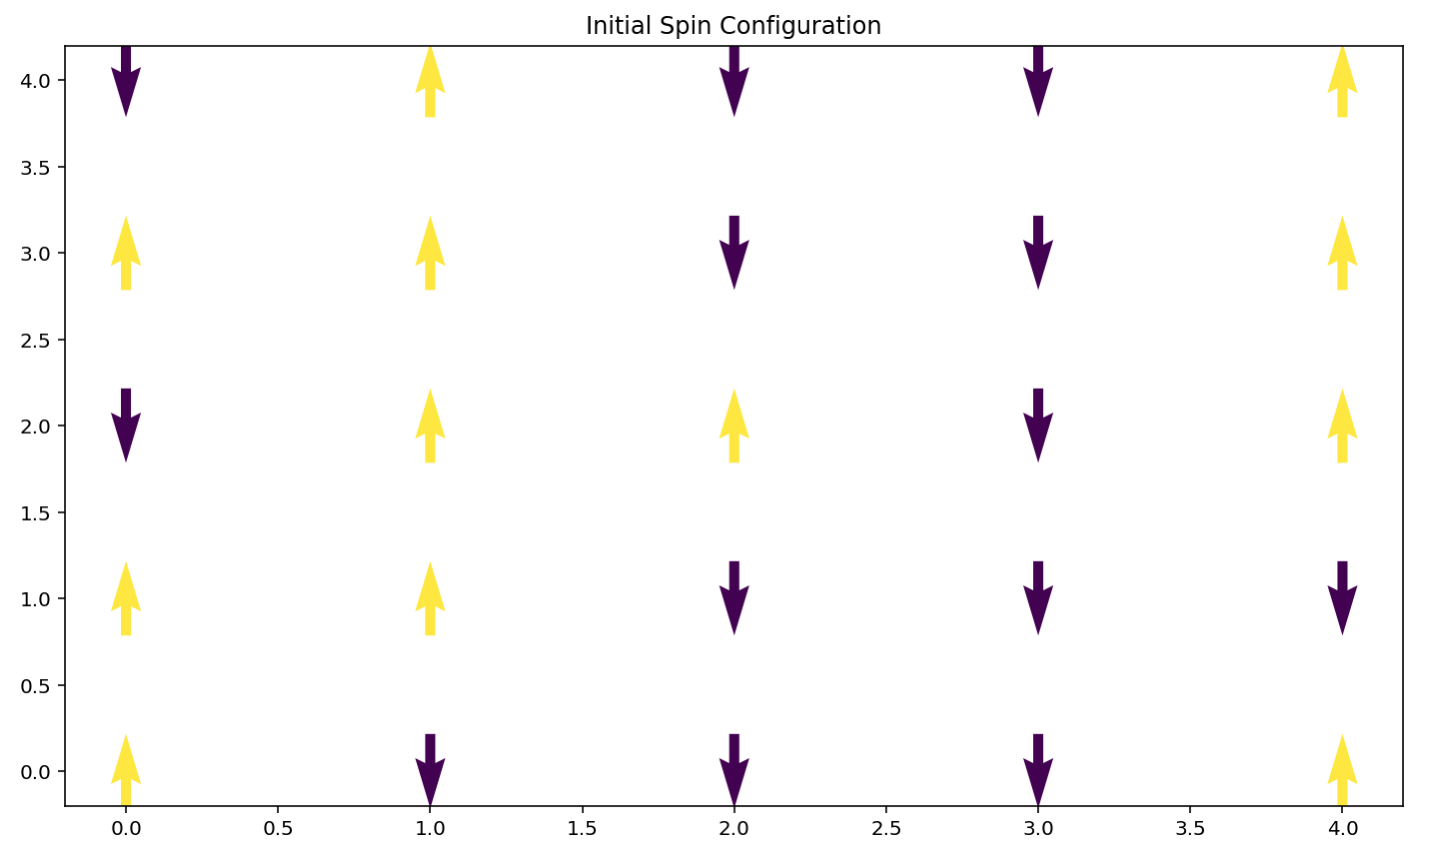

Magnetization after performing the Markov Chain Monte Carlo method:
    

<center>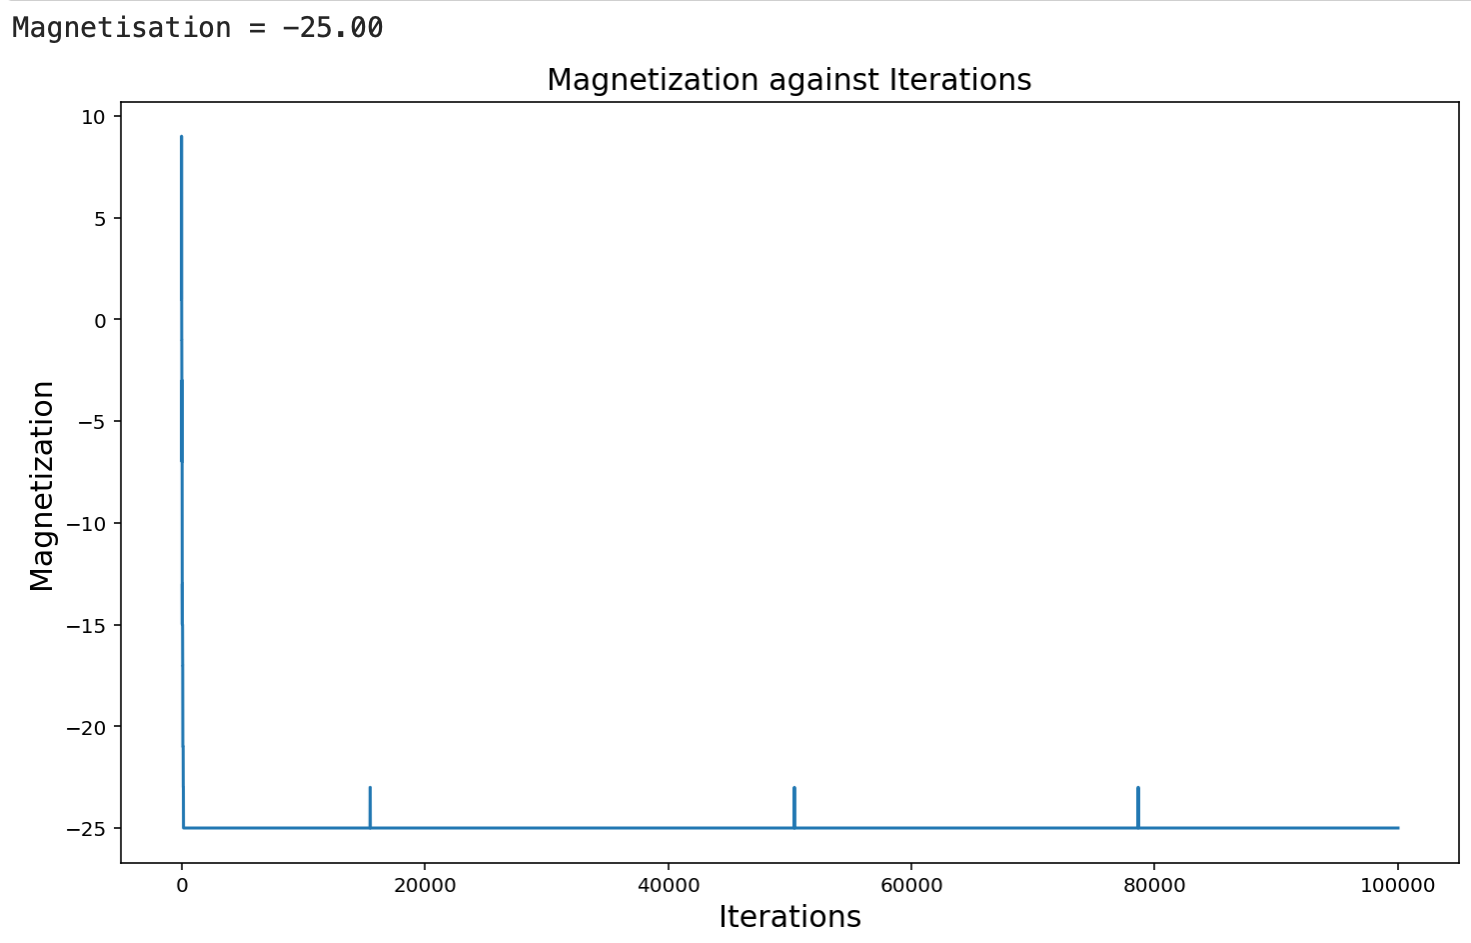</center>
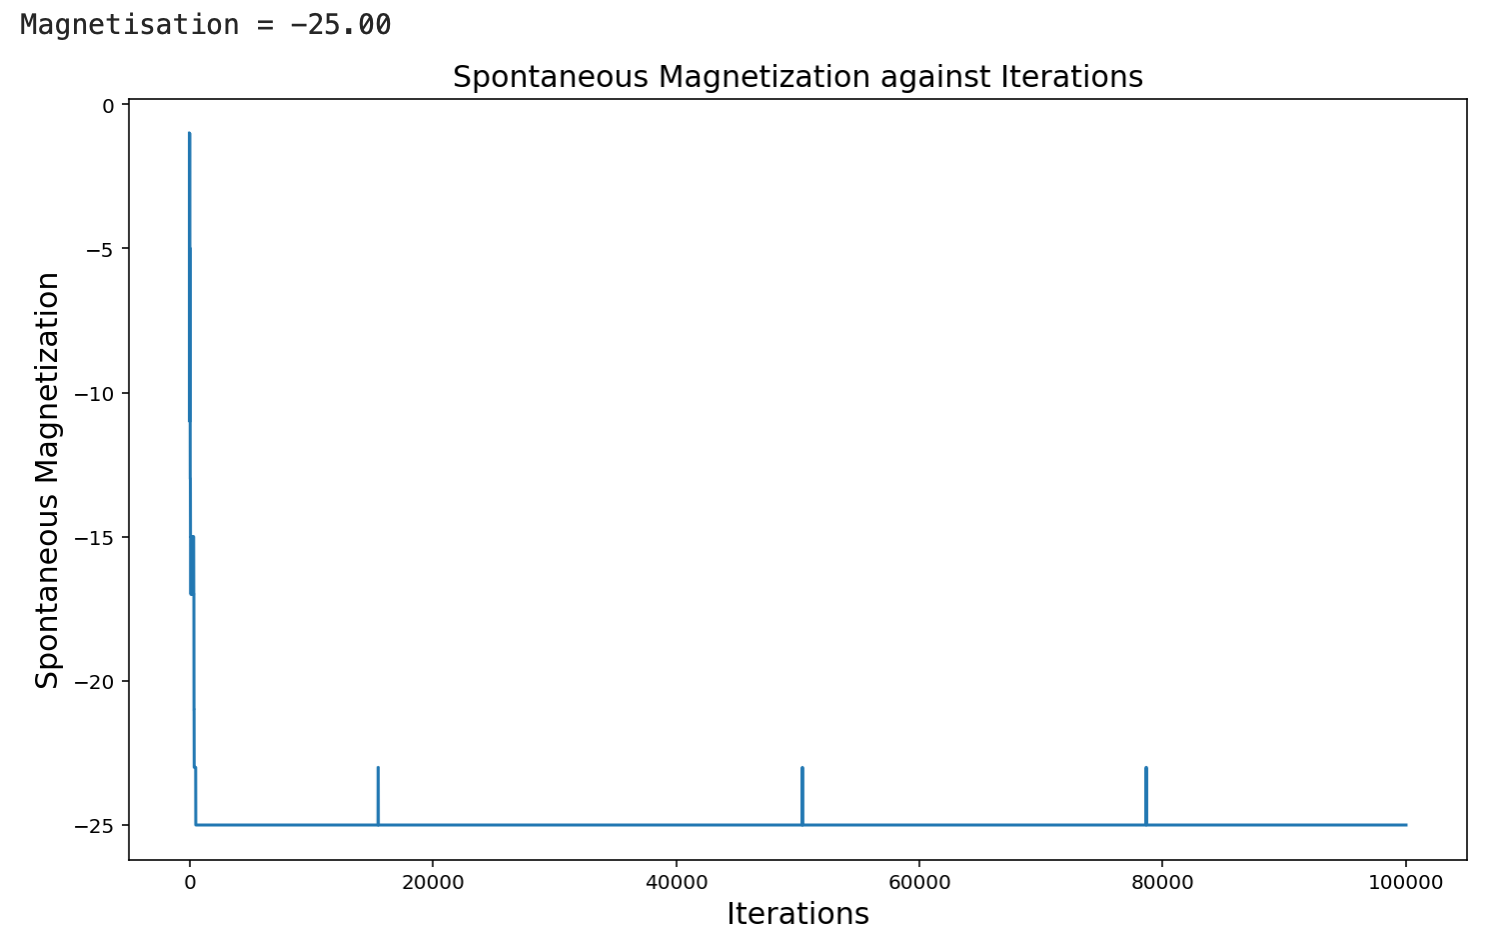

Spin configuration after Markov Chain Monte Carlo method:

<center>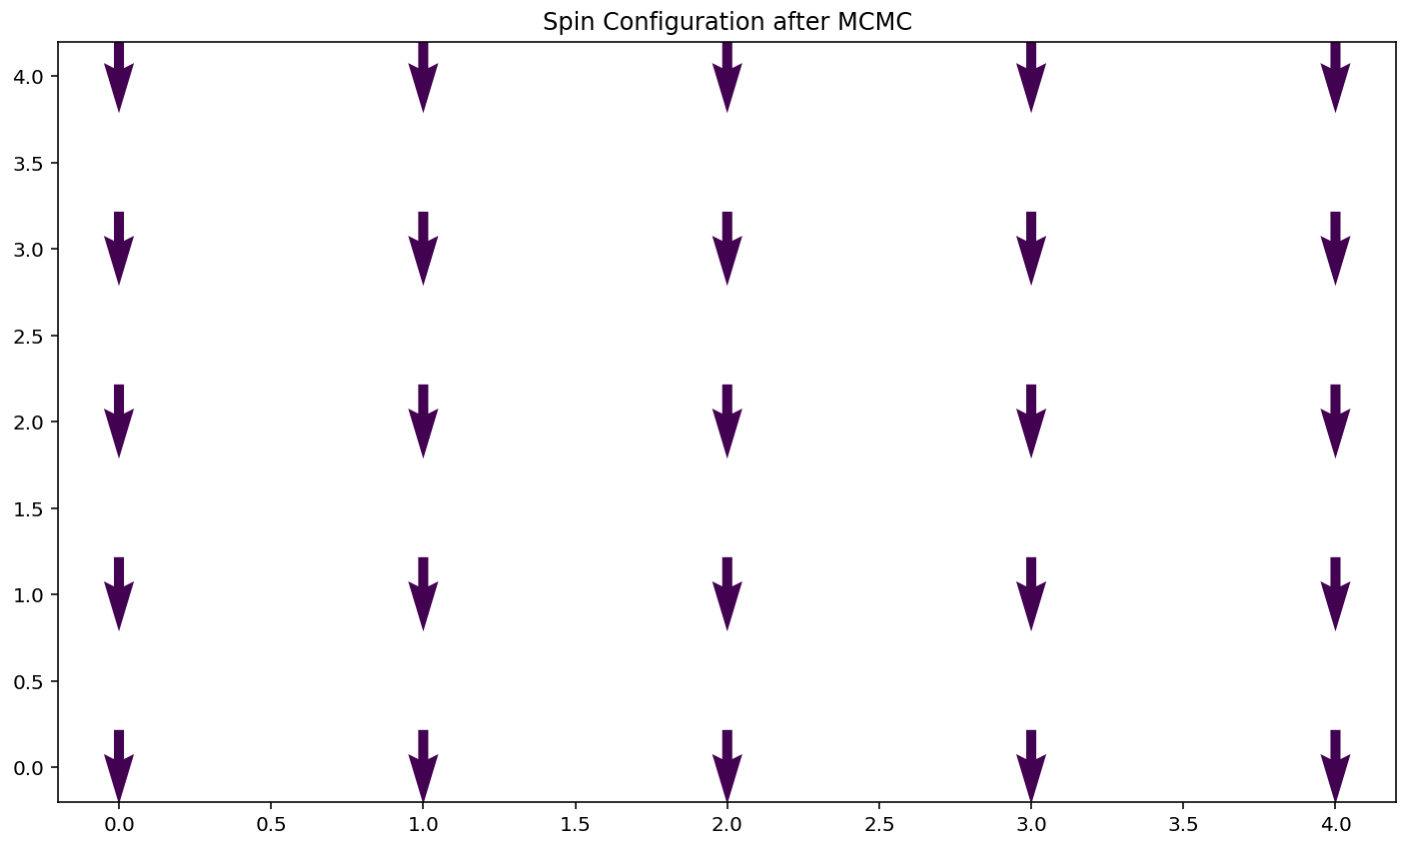</center>

**Case 2: Equilibrated Magnetization with spins "up" at $$T = 1$$**

Initial Spin Configuration (5x5) lattice:

<center>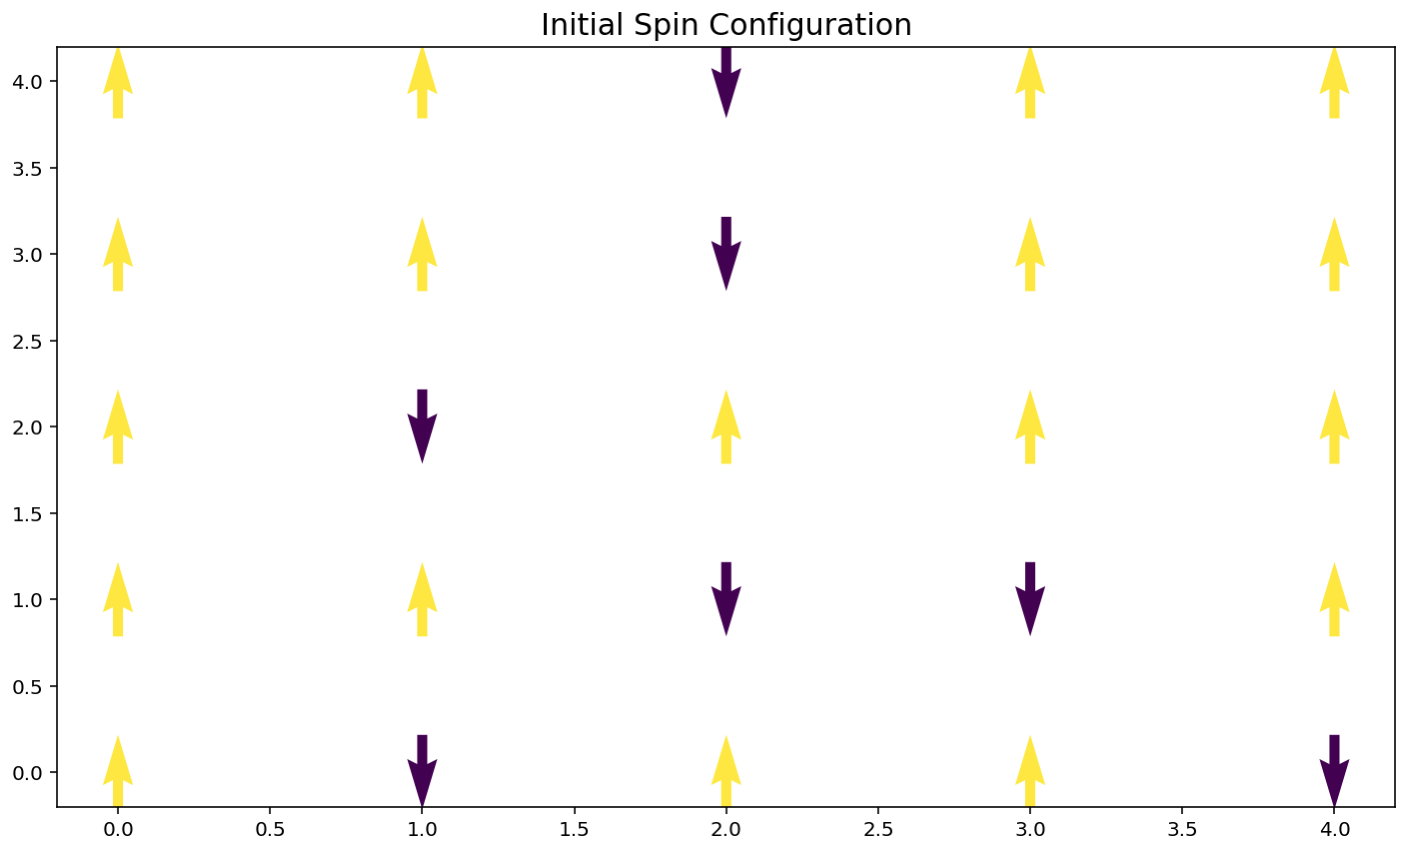</center>
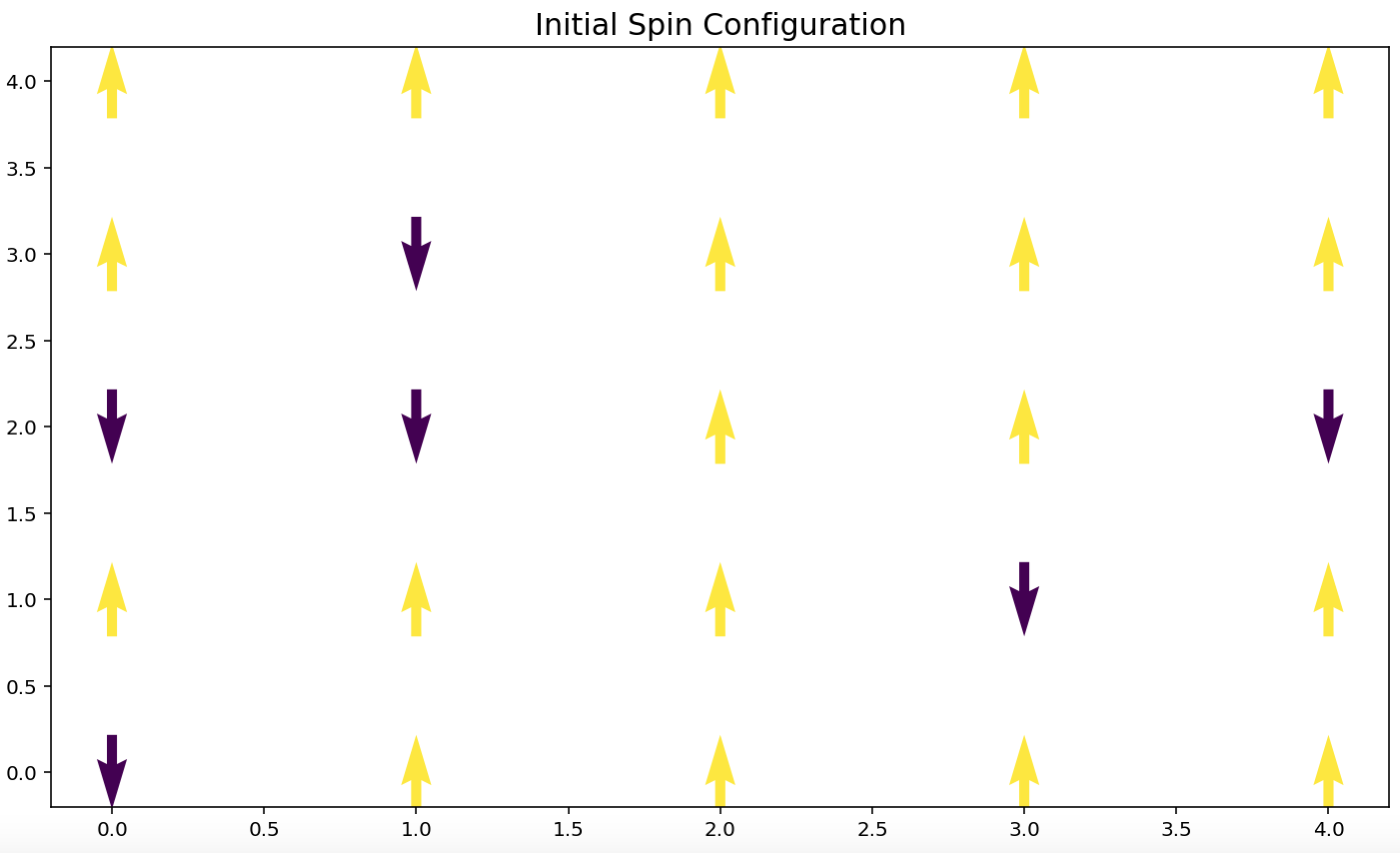

Magnetization after Markov Chain Monte Carlo method:

<center>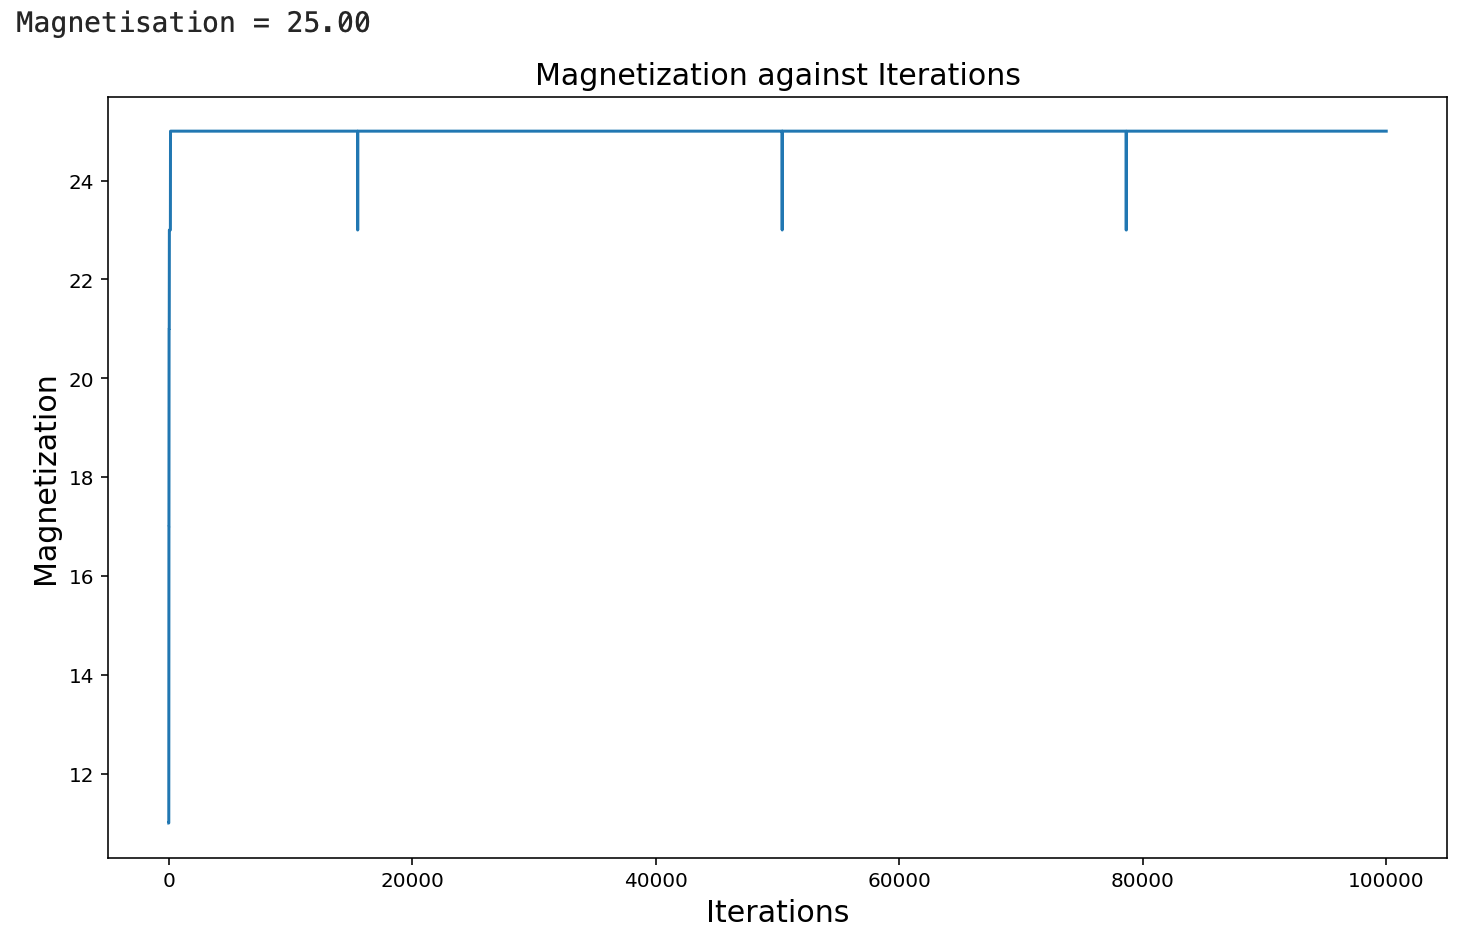</center>
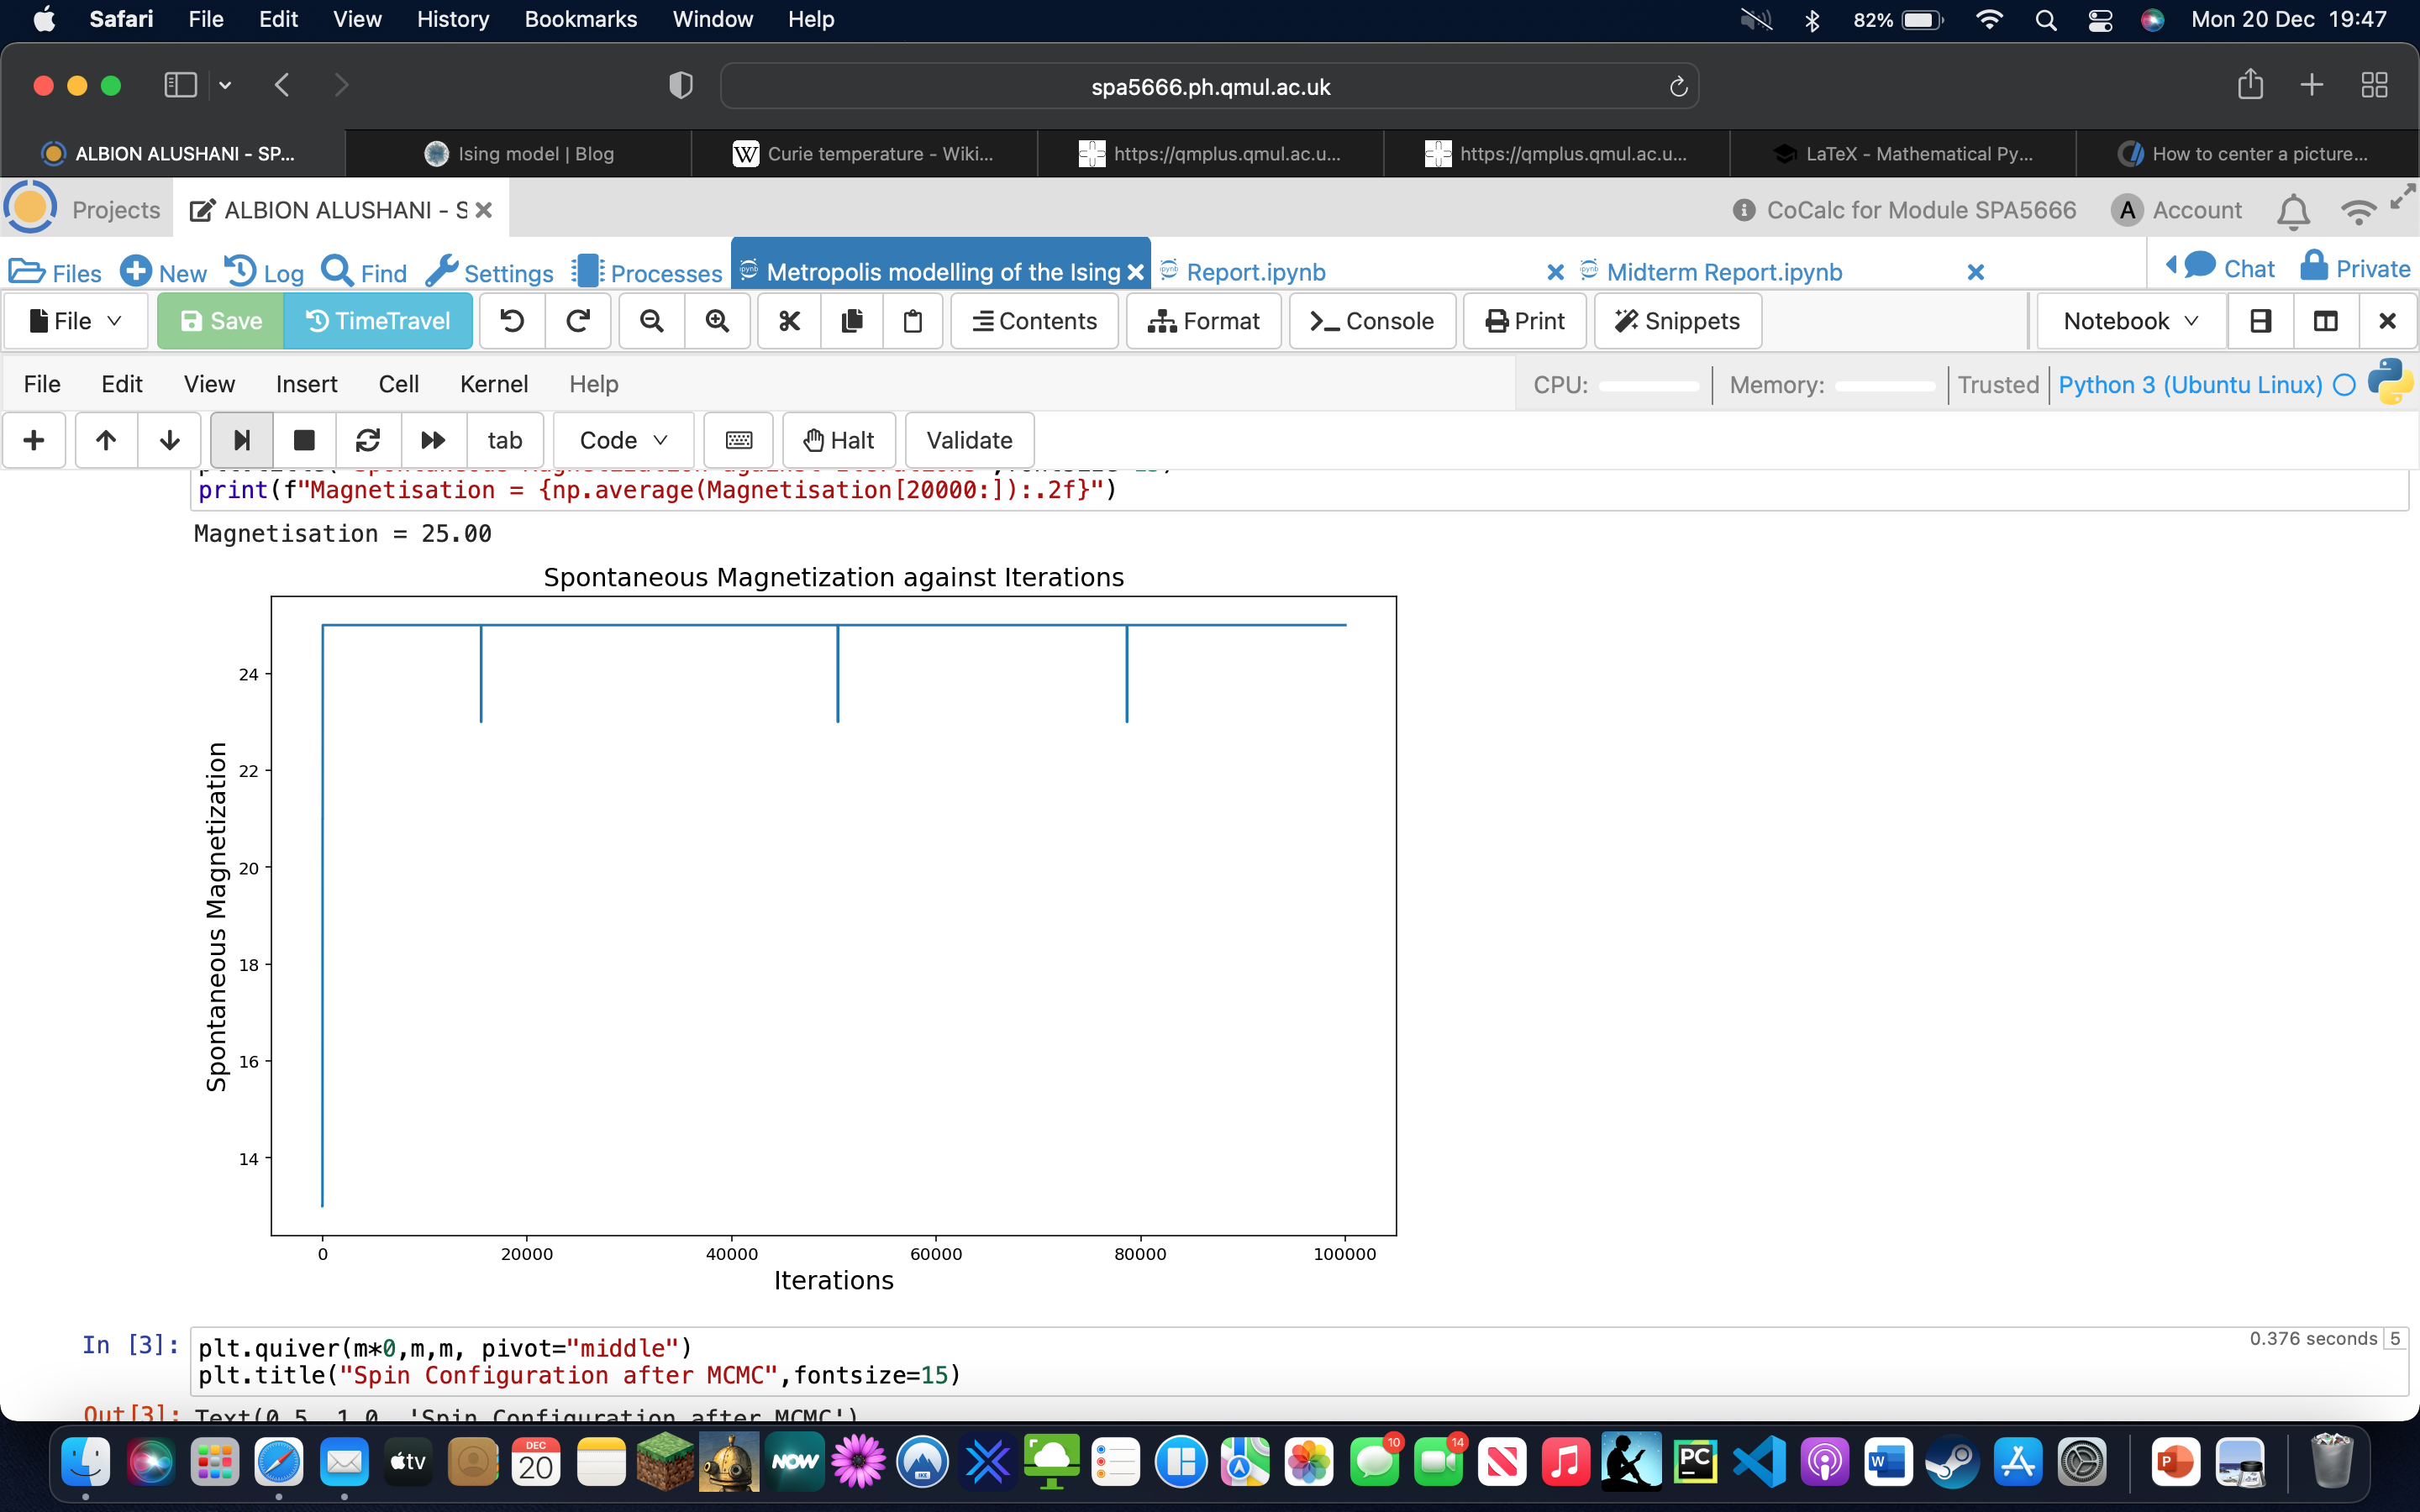
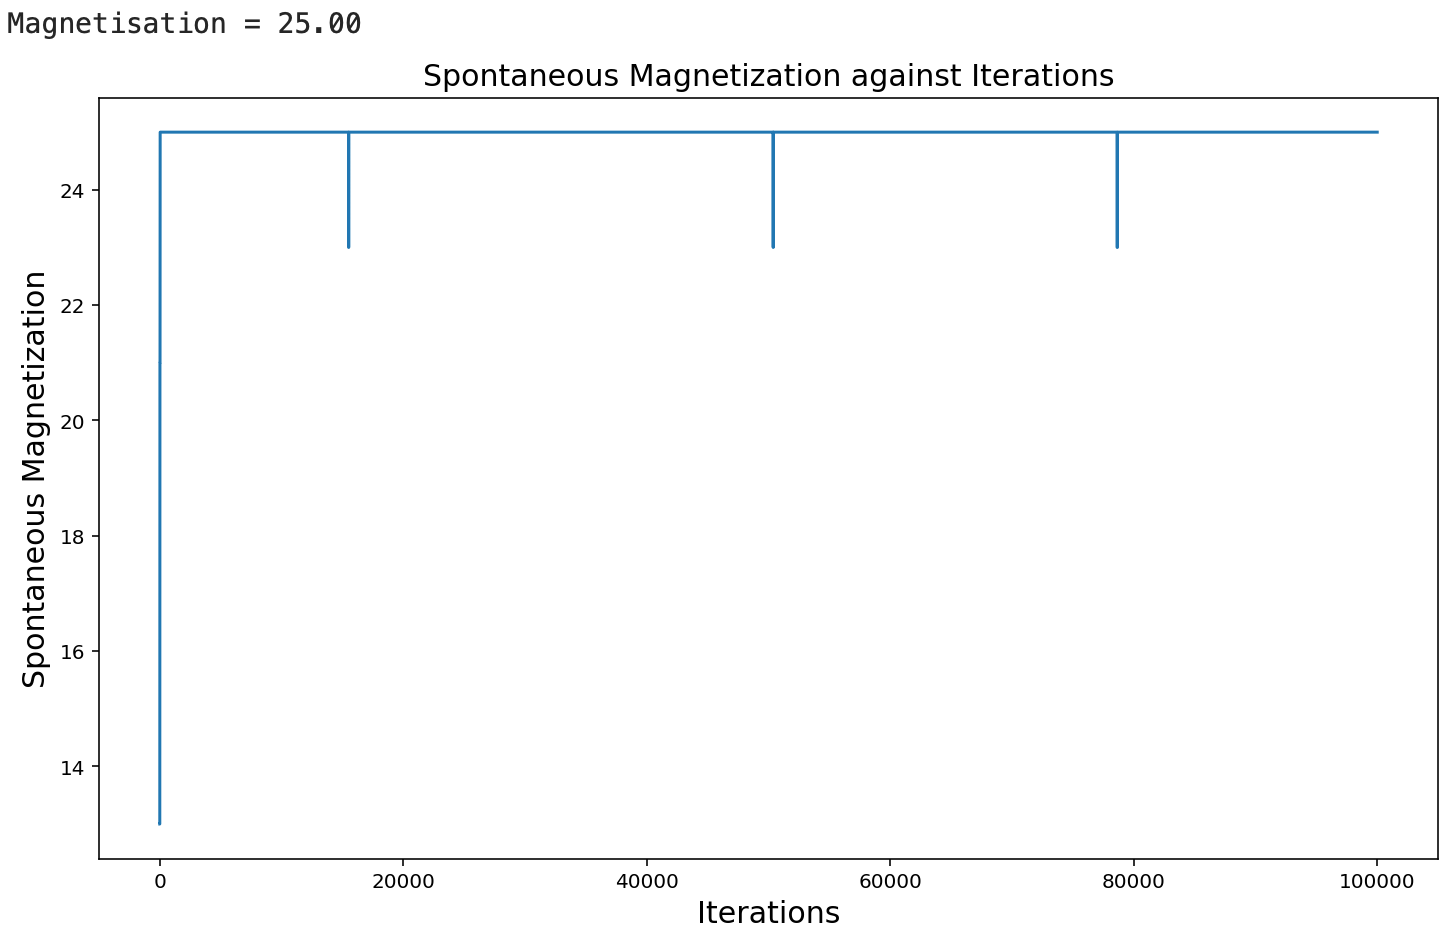

Spin Configuration after Markov Chain Monte Carlo method:

<center>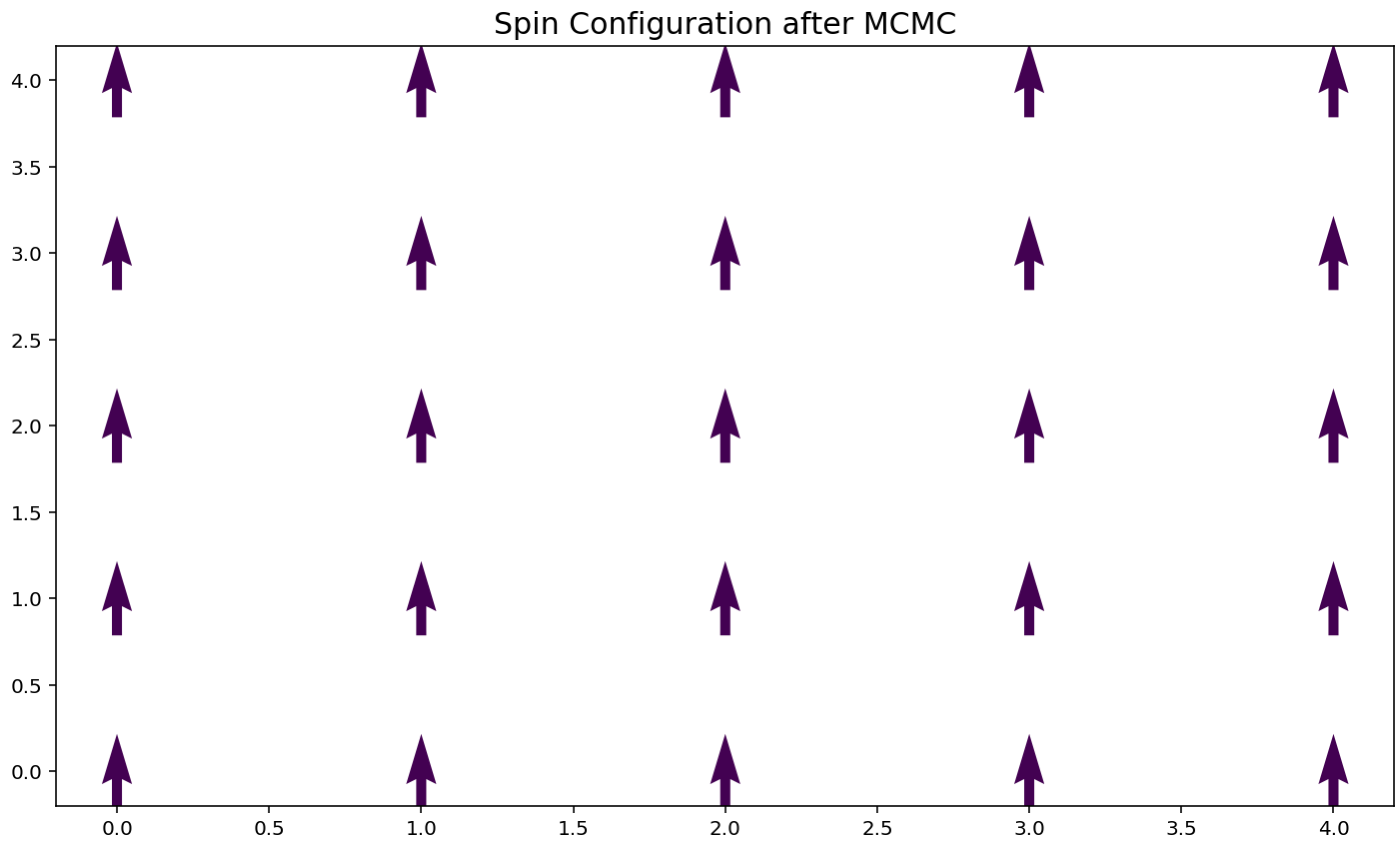</center>

**Case 3: Magnetization at Higher Temperature (T=20):**

Magnetization after Markov Chain Monte Carlo method:

<center>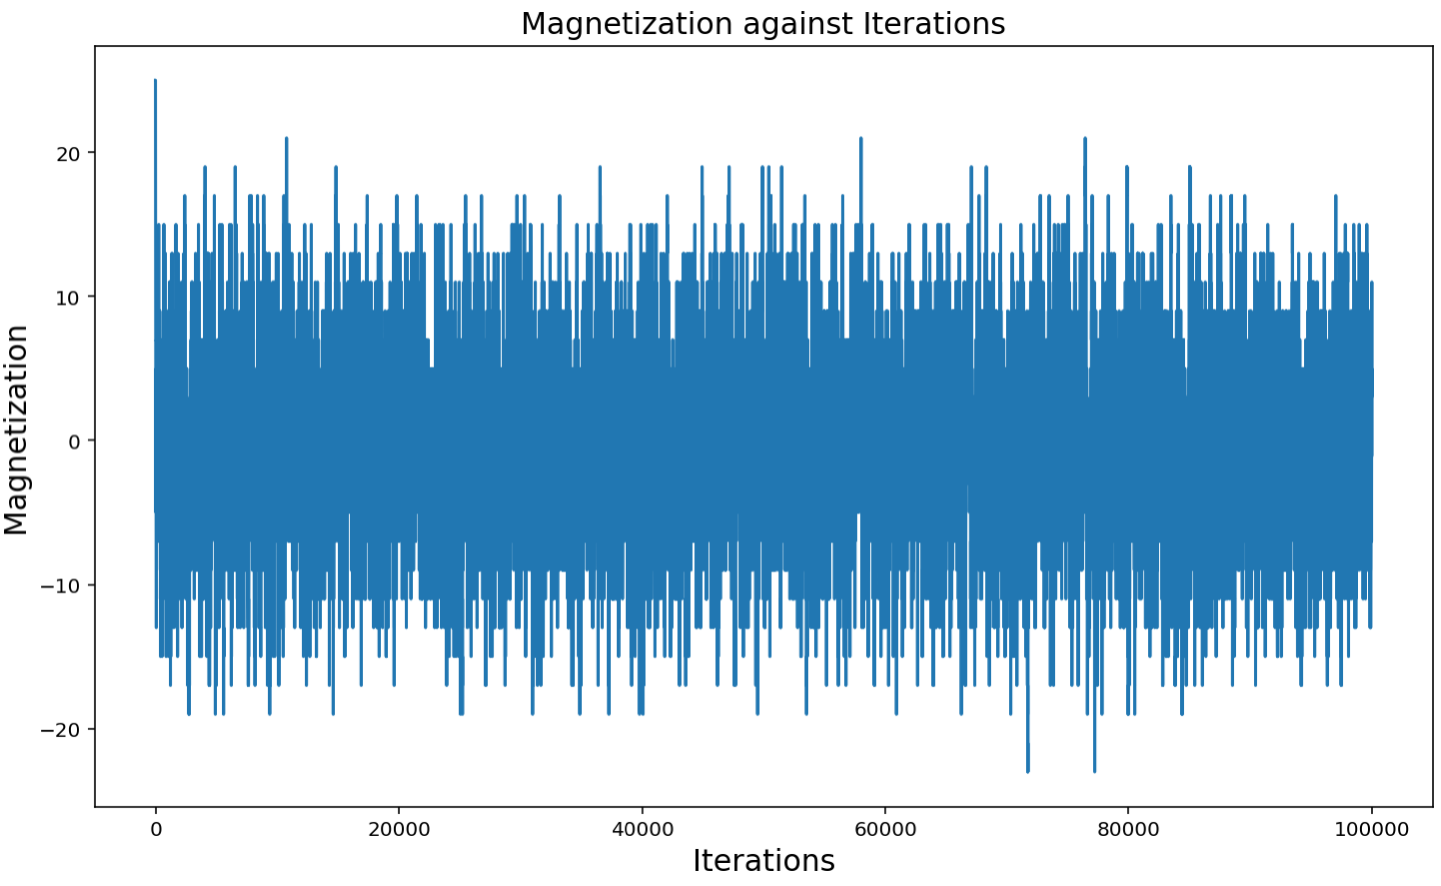</center>

Spin Configuration after Markov Chain Monte Carlo method:

<center>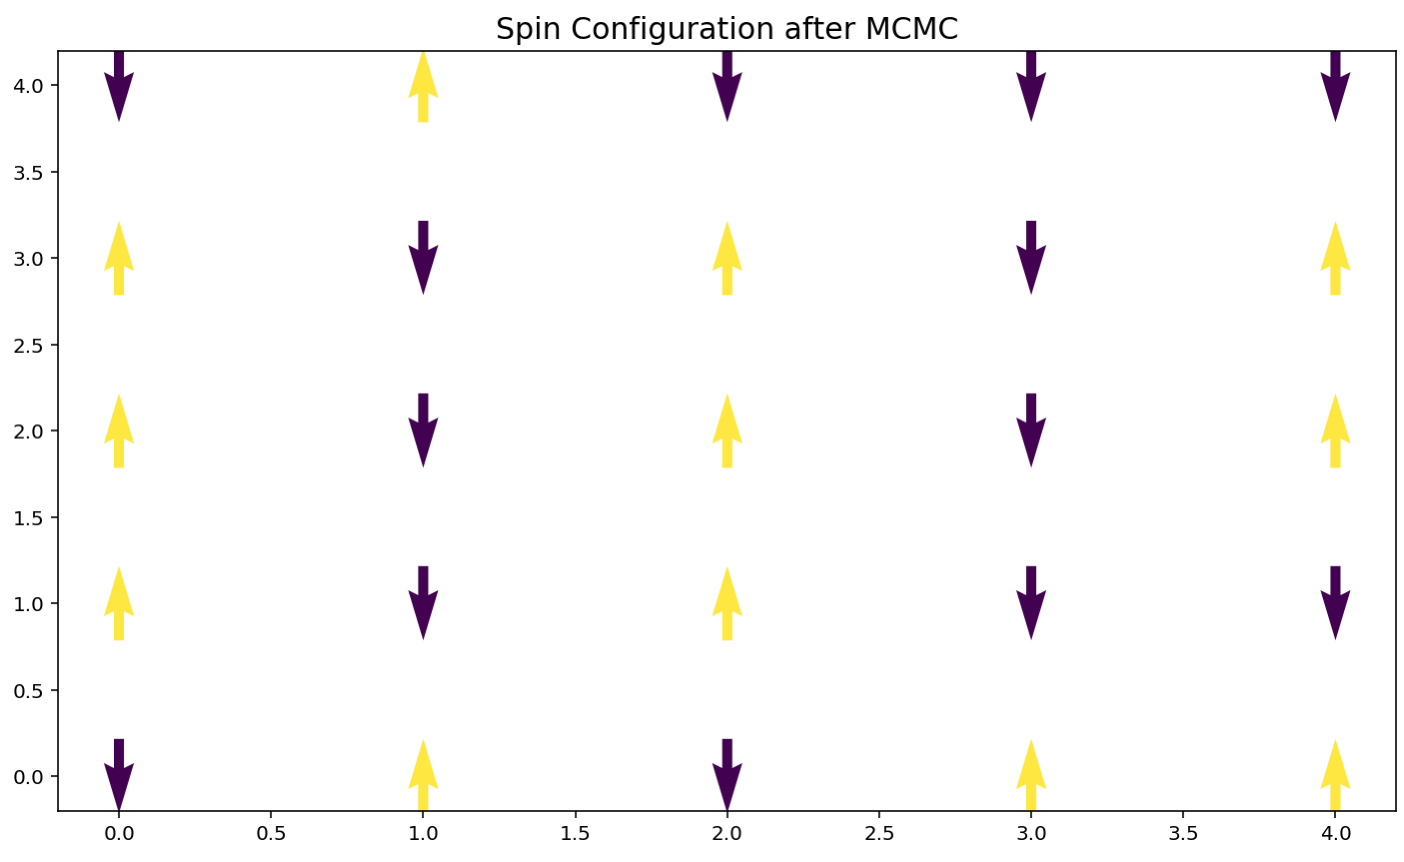</center>

**Case 4: Plot of Equilibrated Magnetization as a Function of Temperature**

<center>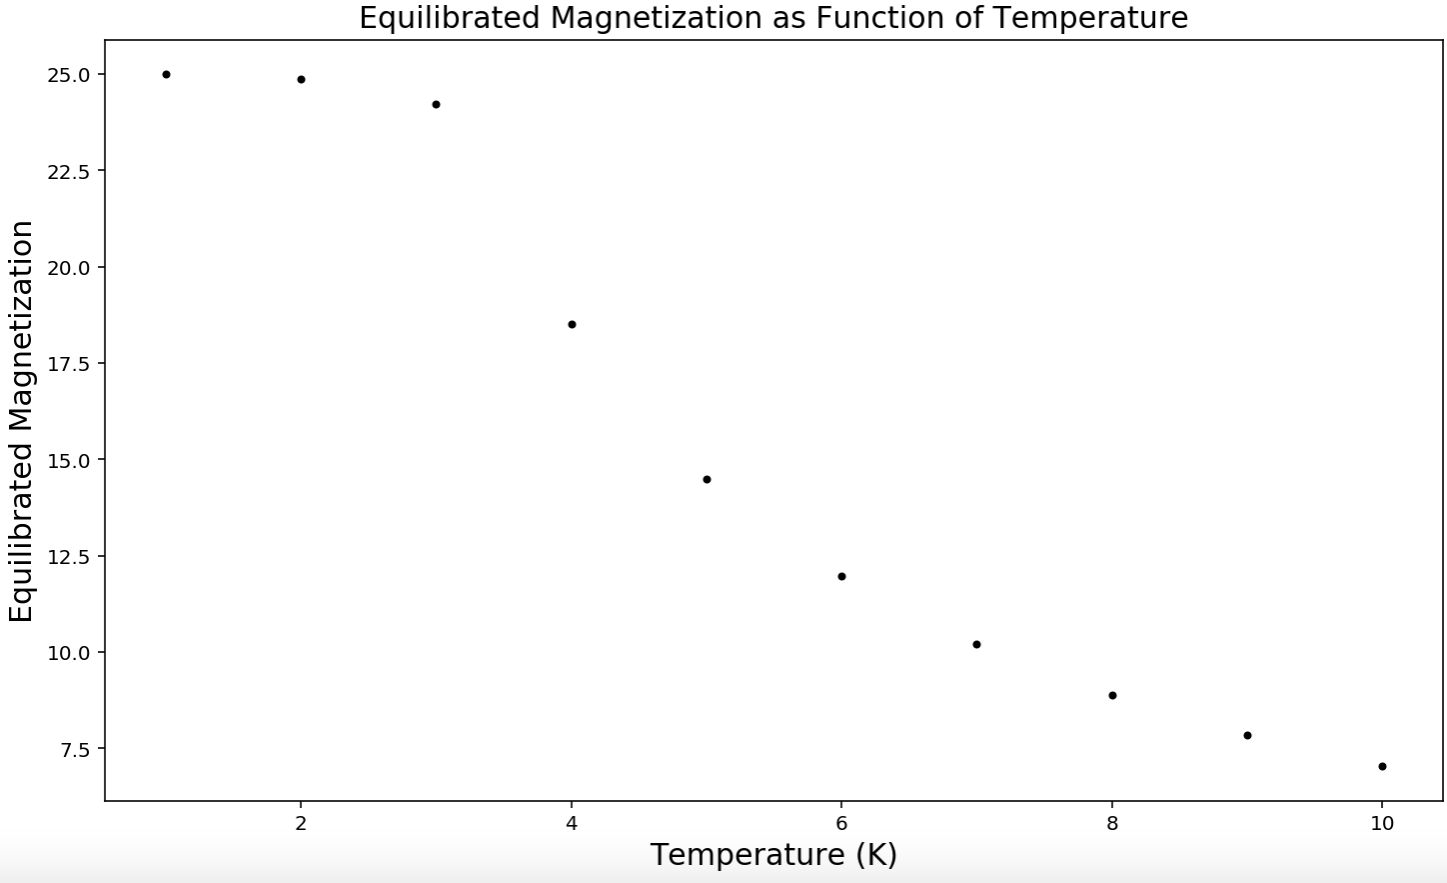</center>

## **Discussion**

It should be noted that each case is random although expect to see similar results. Each of the 4 cases yield different yet simultaneously similar results. One thing to note is that the Curie temperature cannot be determined from Case 1, Case 2 and Case 3, only Case 4. However, while the Curie temperature cannot be determined from Case 1,Case 2 and Case 3 upon inspection, each case gives an indication as to what the true Curie temperature is. Case 4 is clearer to deduce what the true value of the Curie temperature may be by analysing the graph. An ansatz could be made by looking at the original spin configuration and seeing if initally there are more "up" or "down" spins and then deducing that after the Monte Carlo method the equilibrated magnetization would have more spins based off what the majority was initially (for example if there were more spins "up" then after the Monte Carlo method the equilibrated magnetization should have all of its spins facing "up". Each individual case is discussed below.

**Case 1:** Case 1 for when the temperature is at 1 Kelvin is a case for when, after the Monte Carlo method, the spin configuration of the equilibrated magnetization has all of its spins facing "down". The ansatz fails here as initially there are 12 "down" spins and 13 "up" spins in the initial configuration. After performing the Monte Carlo method 100000 times the magnetization was decreasing (burn-in which is the spontaneous magnetization) until it hit -25 after 20000 iterations which from then onwards was consistent at -25 meaning the equilibrated magnetization (the posterior) for this randomly generated system is at -25. While the Curie temperature cannot be determined by inspection from any of these 3 plots, what is known is that magnetization is lost at critial temperature and from the second and third plots of the magnetization after the Monte Carlo method and the Spin Configuration after the Monte Carlo method respectively it is seen that magnetizaiton is not lost **[2]**. From the second plot, there is a clear burn-in and posterior after performing the Monte Carlo method and the third plot we can see that the spins are all aligned parallel to each other without an applied magnetic field. This indicates that when the temperature is 1 this system does not lose its magnetic properties. It also tells us that 1 Kelvin is below the Curie temperature as if 1 Kelvin was above the Curie temperature then the spins would be randomly aligned even after performing the Monte Carlo method and would remain in that state unless a magnetic field is applied.

**Case 2:** Case 2 is identical to Case 1 but the only glaring difference is that after performing the Monte Carlo Method all the spins are "up". The ansatz does not fail here as initially the spin configuration had 18 "up" spins and 7 "down" spins. However after performing the Monte Carlo method this time the Spin Configuration has all the spins aligned "up". Again we can deduce that 1 Kelvin is still below the Curie temperature as all spins are facing the same direction and are parallel to its neighbour. Again the system has not lost its magnetic properties and a magnetic field does not need to be applied.

**Case 3:** Case 3 is interesting. The slight difference from Case 1 and Case 2 applied to Case 3 is that the temperature is changed significantly to 20 Kelvin. There is no point trying to predict what the final Spin Configuration will be after performing the Monte Carlo method as it will always yield the same result. The plot of the Magnetizations against the iterations show no clear burn-in or posterior meaning neither the spontaneous magnetization or the equilibrated magnetization can be found. However this does not mean the result is invalid or incorrect. Rather this gives us even more information of the Curie temperature. Because the magnetization is random and even the Spin Configuration after the Monte Carlo method has its spins randomly aligned it tells us that the system has lost its magnetic properties as the system is above the Curie temperature **[2]** and that a temperature of 20 Kelvin is to high. The only way to get the spins to align is by applying a magnetic field. This, along with the information from both Case 1 and Case 2 indicates that the Curie temperature lies between 1 and 20.

**Case 4:** Case 4 is the plot of equilibrated magnetization as a function of temperature ranging from 1 to 10. The plot does show a decrease in magnetization as temperature increases which is to be expected. However upon inspection we can see that from the third point onwards (which is at temperature = 3 Kelvin) there is a drop in magnetization compared to the first two points (which at temperature 1 and 2 kelvin lie at around 25) and further significant decrease the higher the temperature goes. This plot shows us that the Curie temperature lies between 2 and 3 Kelvin. The known Curie temperature for the Ising model is around 2.269 **[3]**. This plot does have an indication that the Curie temperature is close to the known value. To determine the Curie temperature for a system the method for Case 4 will be the most effective.

## **Conclusion**

To summerise, we can see that by performing the Markov Chain Monte Carlo method for the Ising model for ferromagnetism we can determine the critial temperature at which the system will lose its magnetic properites and whether or not a magnetic field needs to be applied. Since the spins can be in either one of two states, (+1) or (-1), the applied technique of Monte Carlo on the Ising model is a simple and effective way in determining the properties of elements. While both Case 1 and Case 2 were performed at a very low temperature (lower than the known Curie temperature) it still does show how the magnetic properties below the critical temperature does not get reduced which can help give an indication as to what the Curie temperature might be however is ineffective in determining a more accurate value. Case 3 is similar. Despite it showing a loss in magnetic properties due to it being at a higher temperature (20 Kelvin) than the known Curie temperature, it is merely available to help compare with Case 1 and Case 2 and should only be used for limited purposes, such as seeing how a high temperature randomly aligns the spin configuration even after the Monte Carlo method and only to infer that the Curie temperature should be lower than 20. Case 4 is by far the most effective method to locate the Curie temperature. The plot shows a rapid decrease in magnetization after a certain temperature which can help to narrow down the Curie temperature. One limitation of this code is that it merely is for visualization purposes.Should one wish to find the magnitude of the magnetic field required to align the spins of a high temperature system then that could be a fix for future purposes. Another limitation could be the size dependency. A bigger sized system would most likely require better hardware and better costs. Also a larger size leads to less accurate results **[4]** . In all the Metropolis modelling for the Ising model proves accurate enough to determine the Curie temperature and how magnetic properties change depending on temperature.

## **References**

**[1]** <a  href="https://rajeshrinet.github.io/blog/2014/ising-model/"> Github blog written by user rajeshrinet on February 22nd 2020, Last accessed through Google on December 20th 2021, Subject to change   </a>

**[2]** <a  href="https://en.wikipedia.org/wiki/Curie_temperature"> "Curie Temperature", Wikipedia, Last accessed on November 14th 2021 through Google. Subject to change  </a>

**[3]** <a  href="https://www.planetary.org/articles/color-shifting-stars-the-radial-velocity-method"> J Waters, A Berger, D Kramer, H Fangohr and O Hovorka (2018),Engineering and the Environment, University of Southampton, Southampton, SO16 7QF, UK, Last accessed on December 20th 2021 through Google. Subject to change  </a>

**[4]** <a  href="https://towardsdatascience.com/monte-carlo-method-applied-on-a-2d-binary-alloy-using-an-ising-model-on-python-70afa03b172b"> Jonathan Leban, May 7th 2020,towardsdatascience,"Monte Carlo method applied on a 2D binary alloy using an Ising Model on Python", Last accessed on December 20 2021 through Google. Subject to change  </a>